<a href="https://colab.research.google.com/github/VettoriKev/Machine-Learning/blob/main/Vettori_Tp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trabajo practico N°6

# Spotify Top Songs


El dataset contiene la clasificación diaria de las 200 canciones más escuchadas en 53 países de 2017 y 2018 en Spotify. Contiene más de 2 millones de filas, que comprende 6629 artistas, 18598 canciones para un recuento total de ciento cinco mil millones de streams. El objetivo de este proyecto es comprender qué características hacen que una canción sea popular. Con ese fin, también se le proporciona un archivo que contiene datos sobre los atributos de la música (es decir, habla, acústica, tempo) de varias canciones populares. Dado el gran tamaño del conjunto de datos, no dude en simplificar su tarea trabajando con clasificaciones de un solo país o de un solo año. Más información sobre estos datos [aquí](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking).


In [ ]:
import pandas as pd

ranking_spotify_1 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_1.csv")
ranking_spotify_1.head()


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [ ]:
ranking_spotify_1.sample(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
883007,31,Perfect,Ed Sheeran,2493,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-12-26,sv
537946,148,Tenerife Sea,Ed Sheeran,3283,https://open.spotify.com/track/6vSwxzO2Qf4BinH...,2017-01-09,tw
719486,65,Despacito (Featuring Daddy Yankee),Luis Fonsi,9410,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-04-21,tr
493324,126,So Slow,Freestyle,25870,https://open.spotify.com/track/1A40ESJJPEEJrqj...,2017-06-09,ph
379895,96,Lost on You,LP,17826,https://open.spotify.com/track/3SqvR3HYLlCTYzb...,2017-02-14,it
779605,184,My Shit,A Boogie Wit da Hoodie,167451,https://open.spotify.com/track/5uQOauh47VFt3B2...,2017-02-09,us
226383,184,Party Monster,The Weeknd,5911,https://open.spotify.com/track/4F7A0DXBrmUAkp3...,2017-01-19,fi
361216,17,1-800-273-8255,Logic,54702,https://open.spotify.com/track/5tz69p7tJuGPeMG...,2017-11-22,no
519350,152,More Than You Know,Axwell /\ Ingrosso,24108,https://open.spotify.com/track/3PEgB3fkiojxms3...,2017-10-17,ph
693631,29,Crying in the Club,Camila Cabello,1387,https://open.spotify.com/track/1SJtlNRJDeYHioy...,2017-07-17,ee


In [ ]:
ranking_spotify_2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_2.csv")
ranking_spotify_2.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,54,Thunder,Imagine Dragons,5404,https://open.spotify.com/track/0tKcYR2II1VCQWT...,2017-08-24,cr
1,55,"Soy Peor Remix (feat. J Balvin, Ozuna & Arcangel)",Bad Bunny,5339,https://open.spotify.com/track/4UG962ViiLqoUyx...,2017-08-24,cr
2,56,Photograph,Ed Sheeran,5278,https://open.spotify.com/track/6fxVffaTuwjgEk5...,2017-08-24,cr
3,57,Thinking Out Loud,Ed Sheeran,5055,https://open.spotify.com/track/1Slwb6dOYkBlWal...,2017-08-24,cr
4,58,Imitadora,Romeo Santos,4976,https://open.spotify.com/track/6r46lnXFbE9fr2d...,2017-08-24,cr


In [ ]:
ranking_spotify_3 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_3.csv")
ranking_spotify_3.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,193,I'm the One,DJ Khaled,8316,https://open.spotify.com/track/3DXncPQOG4VBw3Q...,2017-11-21,dk
1,194,God Dag,KESI,8298,https://open.spotify.com/track/4Jg4Qp4byYVpJ5m...,2017-11-21,dk
2,195,Castle on the Hill,Ed Sheeran,8293,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,2017-11-21,dk
3,196,September Song,JP Cooper,8278,https://open.spotify.com/track/2Inz7gGPGgieN0C...,2017-11-21,dk
4,197,Mi Gente (feat. Beyoncé),J Balvin,8261,https://open.spotify.com/track/7fwXWKdDNI5IutO...,2017-11-21,dk


In [ ]:
ranking_spotify_4 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/ranking_spotify_4.csv")
ranking_spotify_4.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,69,There for You,Martin Garrix,8323,https://open.spotify.com/track/6jA8HL9i4QGzsj6...,2017-06-24,co
1,70,Por Fin Te Encontré,Cali Y El Dandee,8312,https://open.spotify.com/track/3GpvoKKWZyTwgbL...,2017-06-24,co
2,71,One Dance,Drake,8306,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-06-24,co
3,72,Sé Que Te Duele,Alejandro Fernandez,8221,https://open.spotify.com/track/5vZfgeDfNhlkKeJ...,2017-06-24,co
4,73,Bad Liar,Selena Gomez,8188,https://open.spotify.com/track/1sCxVKWImDZSZKv...,2017-06-24,co


In [ ]:
features = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectTSS/data/featuresdf.csv")
features.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


---
### ¿Que elegimos?
Vemos que los dataset traen en top ranking de varios paises.
 Por lo que tenemos dos opciones o sumamos el numero de reproducciones de todos para hacer un ranking mundial o elegimos un pais para analizar el ranking de un pais para hacer el analisis de este. Para este caso hemos elegido el segundo, y selecionaremos Argentina. 
 Primero veamos que concordancia tiene Argentina con el ranking en general.

In [ ]:
import numpy as np

ranking_ar = ranking_spotify_1[ranking_spotify_1['Region'] == 'ar'].drop(columns='Region')

artists_ar = list(dict.fromkeys(ranking_ar['Artist']))
artists_ar = [x for x in artists_ar if str(x) != 'nan']

found_in_ar = []
for i in range(features.shape[0]):
    artist = features.iloc[i]['artists']
    name = features.iloc[i]['name']
    if artist in artists_ar:
        names = list(dict.fromkeys(ranking_ar[ranking_ar['Artist'] == artist]['Track Name']))
        found_in_ar.append(name in names)
    else:
        found_in_ar.append(False)

print('El ' + str(np.round(100*np.mean(found_in_ar), 1)) + '% de las canciones'
      + ' ha estado en el ranking de Argentina')

El 85.0% de las canciones ha estado en el ranking de Argentina


Vemos que gran parte de las canciones se encuentran en el top, por lo que no es una mala seleccion para el análisis. Por lo que procedemos a calcular la popularidad de las canciones.


In [ ]:
features_ar = features[found_in_ar]

songs = {artist: [] for artist in list(dict.fromkeys(features_ar['artists']))}
for i in range(features_ar.shape[0]):
    songs[features_ar.iloc[i]['artists']].append(features_ar.iloc[i]['name'])

popularity_index = np.zeros((features_ar.shape[0],))

for i in range(ranking_ar.shape[0]):
    artist = ranking_ar.iloc[i]['Artist']
    name = ranking_ar.iloc[i]['Track Name']
    if artist in songs:
        if name in songs[artist]:
            idx, = np.where(np.logical_and(features_ar['artists'] == artist,
                                           features_ar['name'] == name))
            date = ranking_ar.iloc[i]['Date']
            total_streams = np.sum(ranking_ar[ranking_ar['Date'] == date]['Streams'])
            popularity_index[idx[0]] += ranking_ar.iloc[i]['Streams'] / total_streams
            
features_ar.reset_index(drop=True, inplace=True)
features_ar = pd.concat([features_ar, 
                         pd.DataFrame({'popularity_index':popularity_index})], axis=1)

In [ ]:
features_ar.sort_values('popularity_index', inplace=True, ascending=False)
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(features_ar.iloc[:,[1,2,-1]])

                                  name         artists  popularity_index
2   Despacito (Featuring Daddy Yankee)      Luis Fonsi          7.540566
22                           Me Rehúso     Danny Ocean          6.608879
0                         Shape of You      Ed Sheeran          5.786475
42                       Felices los 4          Maluma          5.652973
54                           El Amante       Nicky Jam          4.809053
..                                 ...             ...               ...
55      You Don't Know Me - Radio Edit       Jax Jones          0.021582
33                      1-800-273-8255           Logic          0.021105
70                                Weak             AJR          0.011025
73                    I Like Me Better            Lauv          0.009049
53                                DNA.  Kendrick Lamar          0.001736

[85 rows x 3 columns]


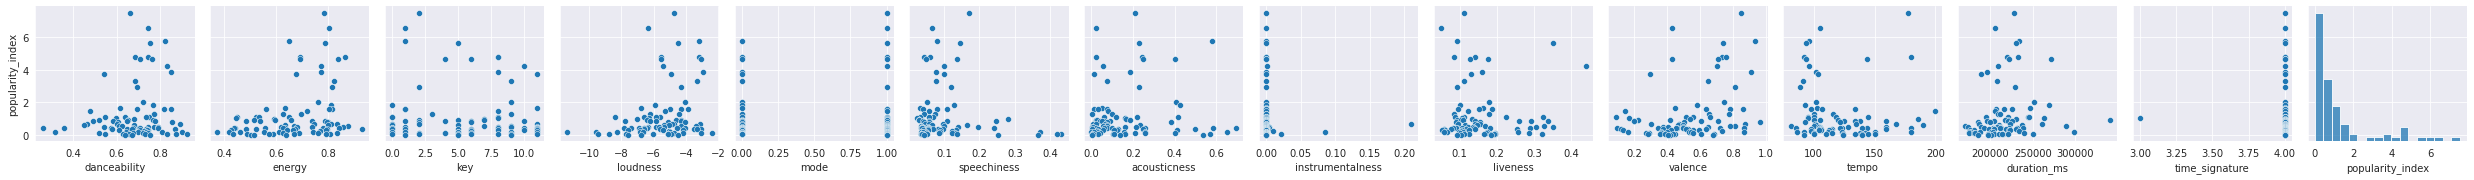

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')
sns.pairplot(data=features_ar, y_vars=['popularity_index'])

Algunos atributos parecieran que responden a una regresión logaritmica, como el caso de la "danceabilidad" y la "energia". Otros como "mode", no parecen tener un comportamiento parametrico a simple vista. Por lo que tenemos dos opciones, o trabajar con algunos atributos para mejorar u optimizar su uso, o la mas facil y elegida por su servidor, sacarlos. 

In [ ]:
features_ar = features_ar.drop(columns=['key','instrumentalness','mode','time_signature'])
features_ar.head()

,id,name,artists,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms,popularity_index
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,-4.757,0.1700,0.2090,0.1120,0.846,177.833,228200.0,7.540566
22,6De0lHrwBfPfrhorm9q1X,Me Rehúso,Danny Ocean,0.744,0.804,-6.327,0.0677,0.0231,0.0494,0.426,104.823,205715.0,6.608879
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,-3.183,0.0802,0.5810,0.0931,0.931,95.977,233713.0,5.786475
42,0qYTZCo5Bwh1nsUFGZP3z,Felices los 4,Maluma,0.755,0.789,-4.502,0.1460,0.2310,0.3510,0.737,93.973,229849.0,5.652973
54,3umS4y3uQDkqekNjVpiRU,El Amante,Nicky Jam,0.683,0.691,-5.535,0.0432,0.2430,0.1400,0.732,179.910,219507.0,4.809053


Normalizamos los atributos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(features_ar.iloc[:,3:12].values)
y = features_ar.iloc[:,-1].values

Ahora se procede a hacer una regresión lineal utilizando atributos polinomiales. Como método de regularización se propone Elastic-Net, ya que combina los beneficios de Lasso y Ridge. Como hay varios parámetros por configurar se utilizará Grid-Search utilizando como score el -MSE, ya que es preferible ante el R^2 para comparar modelos


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(random_state=0)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [1, 2, 3],'elastic_net__alpha': [0.2, 0.5, 1.0, 2.0, 4.0],
              'elastic_net__l1_ratio': [0.2, 0.5, 0.8], 'elastic_net__selection': ['cyclic', 'random']}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('elastic_net',
                                        ElasticNet(random_state=0))]),
             n_jobs=-1,
             param_grid={'elastic_net__alpha': [0.2, 0.5, 1.0, 2.0, 4.0],
                         'elastic_net__l1_ratio': [0.2, 0.5, 0.8],
                         'elastic_net__selection': ['cyclic', 'random'],
                         'poly_features__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best score:', gs.best_score_)
print('Best params:', gs.best_params_)
print('Mean test score:', gs.cv_results_['mean_test_score'])

Best score: -3.1259847434673675
Best params: {'elastic_net__alpha': 0.2, 'elastic_net__l1_ratio': 0.2, 'elastic_net__selection': 'random', 'poly_features__degree': 3}
Mean test score: [-3.19789237 -3.14348545 -3.12598939 -3.19783704 -3.14348503 -3.12598474
 -3.23971571 -3.20966527 -3.20377896 -3.23968854 -3.20966593 -3.20377665
 -3.27189641 -3.26984954 -3.26984954 -3.27189641 -3.26984962 -3.26949195
 -3.25709856 -3.23289757 -3.21998032 -3.25678382 -3.23289752 -3.21997996
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 

Como se puede ver, el MSE es bastante similar en la mayoría de los casos, siendo mejor para las primeras combinaciones. Dado que la variación de los parámetros fue considerable, sería prudente "muestrear" más fino en la zona donde el score es mayor. Se comienza viendo cuáles fueron las primeras 20 combinaciones, las cuales tuvieron mayor score.

In [ ]:
for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value[0:20])

param_elastic_net__alpha : [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.5 0.5]
param_elastic_net__l1_ratio : [0.2 0.2 0.2 0.2 0.2 0.2 0.5 0.5 0.5 0.5 0.5 0.5 0.8 0.8 0.8 0.8 0.8 0.8
 0.2 0.2]
param_elastic_net__selection : ['cyclic' 'cyclic' 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic'
 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic' 'cyclic' 'random'
 'random' 'random' 'cyclic' 'cyclic']
param_poly_features__degree : [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2]
mean_test_score : [-3.19789237 -3.14348545 -3.12598939 -3.19783704 -3.14348503 -3.12598474
 -3.23971571 -3.20966527 -3.20377896 -3.23968854 -3.20966593 -3.20377665
 -3.27189641 -3.26984954 -3.26984954 -3.27189641 -3.26984962 -3.26949195
 -3.25709856 -3.23289757]


En cuanto al alpha, las combinaciones seleccionadas corresponden a alpha=0.2, por lo cual podría hacerse un barrido en torno a ese valor. El parámetro "L1_ratio" afecta negativamente al error cuando aumenta, lo cual es entendible. Esto es porque a mayor L1 hay coeficientes que directamente se hacen cero, y la métrica MSE no tiene en cuenta la complejidad del modelo, es decir la cantidad de coeficientes. Se podría analizar cómo cambia la cantidad de estos, pero no  encontre como hacerlo con GridSearch. Por esto, configuramos "l1_ratio=0".

La selección de coeficientes al ser actualizados no cambia el resultado si se realiza de forma cíclica o aleatoria, por lo cual se deja en cíclica. Por otro lado, un mayor orden de los coeficientes polinomiales disminuye el error, lo cual es esperable. La contrapartida es que aumenta considerablemente la complejidad del modelo.

A continuación se varían los parámetros alpha y degree para analizar mejor su dependencia.

In [ ]:
poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [2, 3, 4, 5, 6],
              'elastic_net__alpha': np.round(np.arange(0.05, 0.30, 0.05), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.05 0.05 0.05 0.05 0.05 0.1 0.1 0.1 0.1 0.1 0.15 0.15 0.15 0.15 0.15 0.2
 0.2 0.2 0.2 0.2 0.25 0.25 0.25 0.25 0.25]
param_poly_features__degree : [2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6]
mean_test_score : [-3.15786812 -3.14825562 -3.18604869 -3.28054988 -3.39552931 -3.10938185
 -3.11191596 -3.12424027 -3.16861082 -3.23608492 -3.08489404 -3.08791734
 -3.09649125 -3.12550714 -3.17376474 -3.07277295 -3.07073474 -3.07772882
 -3.09993981 -3.13820328 -3.06744642 -3.0582899  -3.06350949 -3.08181384
 -3.11400537]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.365e+01, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Vemos que a partir de el feature de orden 4, el error empieza a aumentar, lo que seguramente se debe a que ocurre "overfitng". Pero vemos tambien que mientras mayor es el orden, mayor peso tiene alpha. Por lo que ahora usaremos ordenes bajos con alphas mas grandes.

In [ ]:
param_grid = {'elastic_net__alpha': np.round(np.arange(0.2, 0.6, 0.025), 2),
              'poly_features__degree': [2, 3, 4]}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.2 0.2 0.2 0.22 0.22 0.22 0.25 0.25 0.25 0.28 0.28 0.28 0.3 0.3 0.3 0.32
 0.32 0.32 0.35 0.35 0.35 0.38 0.38 0.38 0.4 0.4 0.4 0.42 0.42 0.42 0.45
 0.45 0.45 0.47 0.47 0.47 0.5 0.5 0.5 0.52 0.52 0.52 0.55 0.55 0.55 0.57
 0.57 0.57]
param_poly_features__degree : [2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2 3 4 2
 3 4 2 3 4 2 3 4 2 3 4]
mean_test_score : [-3.07277295 -3.07073474 -3.07772882 -3.07002524 -3.06527384 -3.07161119
 -3.06744642 -3.0582899  -3.06350949 -3.06627069 -3.0525314  -3.05646607
 -3.06608019 -3.04927096 -3.05226459 -3.06626568 -3.04641403 -3.04840832
 -3.06710649 -3.04279217 -3.0431966  -3.06846981 -3.03985879 -3.03858841
 -3.0696023  -3.03823491 -3.03581285 -3.07087673 -3.03684608 -3.03325163
 -3.07299923 -3.03515477 -3.02977485 -3.0745245  -3.03426002 -3.02767881
 -3.07693588 -3.03322475 -3.02483517 -3.07860596 -3.03271761 -3.02312314
 -3.08117719 -3.03219923 -3.02080557 -3.08292227 -3.03199868 -3.01941449]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.403e+01, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Vemos que aumentando el alpha disminuye el error hasta cierto punto, pero en el caso dos llega un dado alpha el cual hace que el error empiece a aumentar con este. Como no hay variasciones considerables en el error se elige el feature de grado 2 por ser el mas simple.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+02, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Text(0.5, 1.0, '-MSE vs L2 penalty')

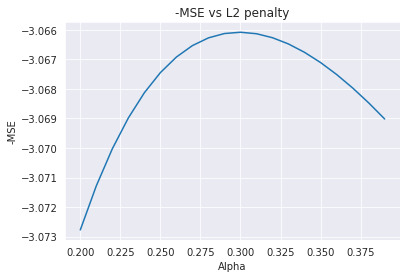

In [ ]:
import matplotlib.pyplot as plt 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'elastic_net__alpha': np.round(np.arange(0.2, 0.4, 0.01), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

plt.plot(gs.cv_results_['param_elastic_net__alpha'], gs.cv_results_['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('-MSE')
plt.title('-MSE vs L2 penalty')

In [ ]:
print('Best params:', gs.best_params_)

Best params: {'elastic_net__alpha': 0.3}


Se utiliza el modelo entonces con los parámetros óptimos y se analiza la importacia de los coeficientes de cada atributo. Para ello se calcula el porcentaje que representa el valor absoluto de cada coeficiente en la suma de los valores absolutos de los coeficientes.

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, alpha=0.3, max_iter=10000)

X_poly = poly_features.fit_transform(X)
elastic_net.fit(X_poly, y)

coefs = np.abs(elastic_net.coef_)
names = poly_features.get_feature_names(features_ar.columns[3:13])
idxs_sorted = np.argsort(coefs)[::-1]
coefs = coefs[idxs_sorted]
names = [names[i] for i in idxs_sorted]

for i in range(len(names)):
    print(names[i] + ':', coefs[i], '(' + str(np.round(100*coefs[i]/np.sum(coefs), 2)) + '%)')

valence^2: 0.23795026623815843 (5.66%)
energy valence: 0.2309096709441782 (5.49%)
loudness valence: 0.2075560165871318 (4.93%)
valence: 0.1805181403746332 (4.29%)
energy: 0.1800885950758671 (4.28%)
danceability energy: 0.17604584441149088 (4.19%)
energy^2: 0.16705938671586076 (3.97%)
danceability valence: 0.1550776270220114 (3.69%)
acousticness valence: 0.1467599263776136 (3.49%)
energy loudness: 0.1459928037603653 (3.47%)
valence duration_ms: 0.12434732395947065 (2.96%)
loudness duration_ms: 0.12231722420005842 (2.91%)
energy duration_ms: 0.12200685418878815 (2.9%)
duration_ms: 0.12166015224936542 (2.89%)
danceability loudness: 0.11464925211527292 (2.73%)
loudness acousticness: 0.11244147116631827 (2.67%)
energy acousticness: 0.10805638035685074 (2.57%)
loudness^2: 0.1062267275296219 (2.53%)
danceability duration_ms: 0.10406110222031324 (2.47%)
loudness: 0.09682332735367097 (2.3%)
valence tempo: 0.09555271781516234 (2.27%)
tempo^2: 0.08430284916577253 (2.0%)
speechiness^2: 0.069059184

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.027e+02, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Estos resultados parecen difíciles de analizar ya que aparecen combinaciones de atributos. Por ello se decide formar un único puntaje para cada atributo de la siguiente manera. Para cada atributo se calculará un promedio ponderado de los porcentajes anteriores, cuyos pesos serán 1 si el coeficiente depende de un sólo atributo o 1/2 si depende de 2 atributos.

<BarContainer object of 9 artists>

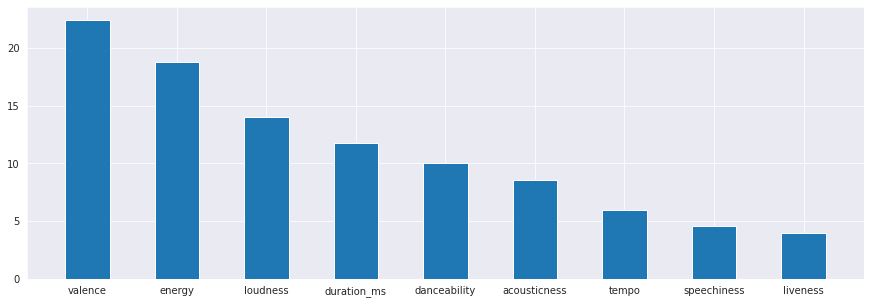

In [ ]:
coefs_percent = 100*coefs/np.sum(coefs)
scores = {key: 0 for key in features_ar.columns[3:12]}

for key in scores.keys():
    for idx, name in enumerate(names):
        if key in name:
            w = 1 if name == key or name == key + '^2' else 1/2
            scores[key] += w*coefs_percent[idx]

scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(15,5))
plt.bar(scores.keys(), scores.values(), width=0.5)

Vemos que los atributos con mas peso son el "valance" y "energy" 

---


---
---

Teniendo estos resultados aún nos puede quedar la duda si la decisión de eliminar los atributos que creimos que no aportaban era correcta.

Por eso repetimos el proceso, pero ahora teniendo en cuenta dichos atributos.


In [ ]:
features_ar.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_index
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.0,0.1120,0.846,177.833,228200.0,4.0,7.540566
22,6De0lHrwBfPfrhorm9q1X,Me Rehúso,Danny Ocean,0.744,0.804,1.0,-6.327,1.0,0.0677,0.0231,0.0,0.0494,0.426,104.823,205715.0,4.0,6.608879
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.0,0.0931,0.931,95.977,233713.0,4.0,5.786475
42,0qYTZCo5Bwh1nsUFGZP3z,Felices los 4,Maluma,0.755,0.789,5.0,-4.502,1.0,0.1460,0.2310,0.0,0.3510,0.737,93.973,229849.0,4.0,5.652973
54,3umS4y3uQDkqekNjVpiRU,El Amante,Nicky Jam,0.683,0.691,8.0,-5.535,1.0,0.0432,0.2430,0.0,0.1400,0.732,179.910,219507.0,4.0,4.809053


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(features_ar.iloc[:,3:15].values)
y = features_ar.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(random_state=0)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [1, 2, 3],'elastic_net__alpha': [0.2, 0.5, 1.0, 2.0, 4.0],
              'elastic_net__l1_ratio': [0.2, 0.5, 0.8], 'elastic_net__selection': ['cyclic', 'random']}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('elastic_net',
                                        ElasticNet(random_state=0))]),
             n_jobs=-1,
             param_grid={'elastic_net__alpha': [0.2, 0.5, 1.0, 2.0, 4.0],
                         'elastic_net__l1_ratio': [0.2, 0.5, 0.8],
                         'elastic_net__selection': ['cyclic', 'random'],
                         'poly_features__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best score:', gs.best_score_)
print('Best params:', gs.best_params_)
print('Mean test score:', gs.cv_results_['mean_test_score'])

Best score: -3.1909828330228587
Best params: {'elastic_net__alpha': 0.2, 'elastic_net__l1_ratio': 0.2, 'elastic_net__selection': 'cyclic', 'poly_features__degree': 3}
Mean test score: [-3.21810714 -3.19306471 -3.19098283 -3.21811042 -3.19306403 -3.19098483
 -3.23971571 -3.21153894 -3.2063075  -3.23992784 -3.21153567 -3.20630508
 -3.27189641 -3.26984954 -3.26984954 -3.27189641 -3.26992246 -3.26999573
 -3.25709856 -3.23384253 -3.22154288 -3.25716787 -3.23384225 -3.22154405
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077 -3.27126077
 -3.27126077 

In [ ]:
for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value[0:20])

param_elastic_net__alpha : [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.5 0.5]
param_elastic_net__l1_ratio : [0.2 0.2 0.2 0.2 0.2 0.2 0.5 0.5 0.5 0.5 0.5 0.5 0.8 0.8 0.8 0.8 0.8 0.8
 0.2 0.2]
param_elastic_net__selection : ['cyclic' 'cyclic' 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic'
 'cyclic' 'random' 'random' 'random' 'cyclic' 'cyclic' 'cyclic' 'random'
 'random' 'random' 'cyclic' 'cyclic']
param_poly_features__degree : [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2]
mean_test_score : [-3.21810714 -3.19306471 -3.19098283 -3.21811042 -3.19306403 -3.19098483
 -3.23971571 -3.21153894 -3.2063075  -3.23992784 -3.21153567 -3.20630508
 -3.27189641 -3.26984954 -3.26984954 -3.27189641 -3.26992246 -3.26999573
 -3.25709856 -3.23384253]


In [ ]:
poly_features = PolynomialFeatures(include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'poly_features__degree': [2, 3, 4, 5, 6],
              'elastic_net__alpha': np.round(np.arange(0.05, 0.30, 0.05), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.05 0.05 0.05 0.05 0.05 0.1 0.1 0.1 0.1 0.1 0.15 0.15 0.15 0.15 0.15 0.2
 0.2 0.2 0.2 0.2 0.25 0.25 0.25 0.25 0.25]
param_poly_features__degree : [2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6 2 3 4 5 6]
mean_test_score : [-3.34573307 -3.41876893 -3.55169214 -3.71425233 -3.84374582 -3.27082657
 -3.33393822 -3.41559008 -3.5302025  -3.64320558 -3.2305251  -3.29003388
 -3.35542386 -3.44735984 -3.54763651 -3.20629542 -3.26057598 -3.318087
 -3.39696671 -3.48800921 -3.1910168  -3.2389656  -3.29143178 -3.36171226
 -3.44574035]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+02, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Para este caso el overfiting es mucho mas notorio.

In [ ]:
param_grid = {'elastic_net__alpha': np.round(np.arange(0.1, 1.6, 0.1), 2),
              'poly_features__degree': [2, 3]}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

for key, value in gs.cv_results_.items():
    if key[0:6] == 'param_' or key == 'mean_test_score':
        print(key, ':', value)

param_elastic_net__alpha : [0.1 0.1 0.2 0.2 0.3 0.3 0.4 0.4 0.5 0.5 0.6 0.6 0.7 0.7 0.8 0.8 0.9 0.9
 1.0 1.0 1.1 1.1 1.2 1.2 1.3 1.3 1.4 1.4 1.5 1.5]
param_poly_features__degree : [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]
mean_test_score : [-3.27082657 -3.33393822 -3.20629542 -3.26057598 -3.18120189 -3.22239279
 -3.17100532 -3.19888593 -3.16760224 -3.18347959 -3.16757562 -3.17309494
 -3.16928806 -3.16603597 -3.17189172 -3.16127591 -3.17492538 -3.15815299
 -3.17813041 -3.15622113 -3.18135969 -3.15516937 -3.18452969 -3.15477522
 -3.18759417 -3.15487615 -3.19052903 -3.15535143 -3.19332357 -3.15611013]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+02, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+02, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Text(0.5, 1.0, '-MSE vs L2 penalty')

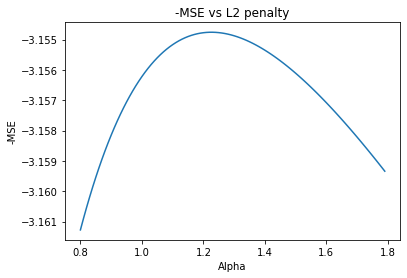

In [ ]:
import matplotlib.pyplot as plt 

poly_features = PolynomialFeatures(degree=3, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, max_iter=10000)
pipe = Pipeline([("poly_features", poly_features), ("elastic_net", elastic_net)])

param_grid = {'elastic_net__alpha': np.round(np.arange(0.8, 1.8, 0.01), 2)}

gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
gs.fit(X, y)

plt.plot(gs.cv_results_['param_elastic_net__alpha'], gs.cv_results_['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('-MSE')
plt.title('-MSE vs L2 penalty')

In [ ]:
print('Best params:', gs.best_params_)

Best params: {'elastic_net__alpha': 1.23}


In [ ]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
elastic_net = ElasticNet(l1_ratio=0, alpha=0.3, max_iter=10000)

X_poly = poly_features.fit_transform(X)
elastic_net.fit(X_poly, y)

coefs = np.abs(elastic_net.coef_)
names = poly_features.get_feature_names(features_ar.columns[3:15])
idxs_sorted = np.argsort(coefs)[::-1]
coefs = coefs[idxs_sorted]
names = [names[i] for i in idxs_sorted]

for i in range(len(names)):
    print(names[i] + ':', coefs[i], '(' + str(np.round(100*coefs[i]/np.sum(coefs), 2)) + '%)')

energy valence^2: 0.12268235066323478 (0.97%)
valence^3: 0.12243663329452088 (0.97%)
loudness valence^2: 0.12230928211677818 (0.97%)
energy valence: 0.12190243746099778 (0.97%)
valence^2: 0.11641459637108738 (0.92%)
acousticness valence^2: 0.11320374796890202 (0.9%)
mode tempo^2: 0.10558792864688973 (0.84%)
energy^2 valence: 0.10401616026447641 (0.83%)
danceability energy valence: 0.10276752522561261 (0.82%)
loudness acousticness valence: 0.1025023633431638 (0.81%)
danceability energy: 0.10133689804056538 (0.81%)
energy loudness valence: 0.10115453179821102 (0.8%)
acousticness valence: 0.1003982681458511 (0.8%)
mode valence tempo: 0.0989961974744454 (0.79%)
loudness valence: 0.09668682316576918 (0.77%)
loudness^2 valence: 0.09607128779149175 (0.76%)
danceability energy^2: 0.09495515759707177 (0.75%)
energy: 0.09092276897970712 (0.72%)
danceability valence^2: 0.08897874158743828 (0.71%)
danceability loudness valence: 0.0866955549151314 (0.69%)
danceability energy mode: 0.084690562839954

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.186e+01, tolerance: 2.348e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<BarContainer object of 12 artists>

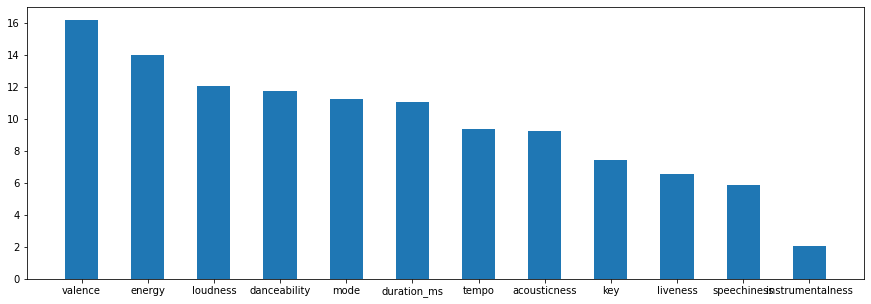

In [ ]:
coefs_percent = 100*coefs/np.sum(coefs)
scores = {key: 0 for key in features_ar.columns[3:15]}

for key in scores.keys():
    for idx, name in enumerate(names):
        if key in name:
            w = 1 if name == key or name == key + '^2' else 1/2
            scores[key] += w*coefs_percent[idx]

scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(15,5))
plt.bar(scores.keys(), scores.values(), width=0.5)

Vemos principalmente que el error es ligeramente mayor, y hay que tener en cuenta que se opto por un modelo de un orden mayor. Sin embargo vemos que el modelo le tiene relativa importancia a algunos atributos eliminados anteriormente, esto puede significar que con el tratamiento adecuado estos atributos pueden traer una mejora concreta al modelo. Pero como este trabajo es solo de indole didactico, no se opto por dedicarle trabajo a la modificación del feature. 
Aun asi podemos ver que los métodos de regresión resultan útiles no sólo para predecir valores numéricos a partir de un conjunto de datos, si no para analizar la relación entre variables independientes y dependiente.